# Estudio - Clasificación de las plantas Iris

## 1. Importar las librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Importar el Dataset
Visualizaremos los primeros datos con `head()` y los últimos datos con `tail()`
* SL - sepal length
* SW - sepal width
* PL - petal length
* PW - petal width

In [8]:
iris=pd.read_csv("iris.csv", names=["SL", "SW", "PL", "PW", "CLASS"])
iris.head()


,SL,SW,PL,PW,CLASS
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.tail()

,SL,SW,PL,PW,CLASS
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## 2. Explorar los datos
Visualizaremos las distribuciones por columnas utilizando histogramas

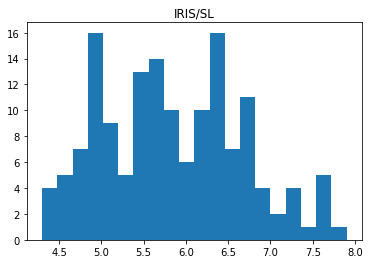

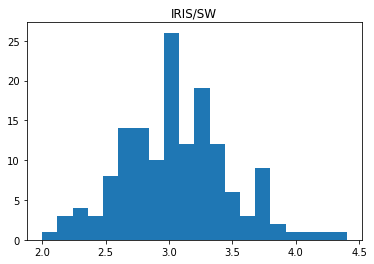

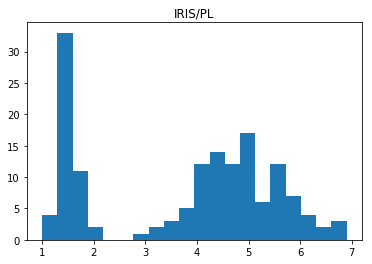

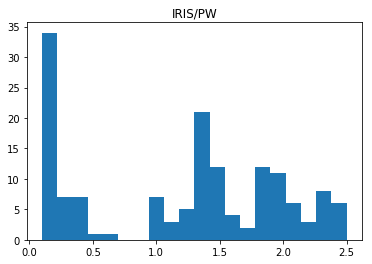

In [17]:
for col in ["SL", "SW", "PL", "PW"]:
    plt.hist(iris[col],20)
    plt.title("IRIS/{}".format(col))
    plt.show()

## 3. Análisis sobre el SW (Sepal Width)
La distribución de las mediciones del áncho de sépalo parecen ser normales (con una distribución normal). Por lo que resulta interesante ver qué tan bien se ajusta a una distribución normal. Para esto, podemos calcular la media de las mediciones y su desviación estándar. 

In [16]:
sw_mean=sum(iris["SW"])/len(iris["SW"])
print("SW MEAN: {}".format(sw_mean))

SW MEAN: 3.0540000000000007


In [23]:
sw=iris["SW"]
sw2=(sw-sw_mean)**2
print(sw2[:5])

0    0.198916
1    0.002916
2    0.021316
3    0.002116
4    0.298116
Name: SW, dtype: float64


In [25]:
sw_var=sum(sw2)/(len(sw2)-1)
print("SW VAR: {}".format(sw_var))

SW VAR: 0.18800402684563763


In [27]:
sw_sd=sw_var**0.5
print( "Standard Deviation: {}".format(sw_sd))

Standard Deviation: 0.4335943113621737


In [29]:
print("68% -> ({:.2f}, {:.2f})".format(sw_mean-sw_sd,sw_mean+sw_sd ))
print("95% -> ({:.2f}, {:.2f})".format(sw_mean-2*sw_sd,sw_mean+2*sw_sd ))
print("99% -> ({:.2f}, {:.2f})".format(sw_mean-3*sw_sd,sw_mean+3*sw_sd ))


68% -> (2.62, 3.49)
95% -> (2.19, 3.92)
99% -> (1.75, 4.35)


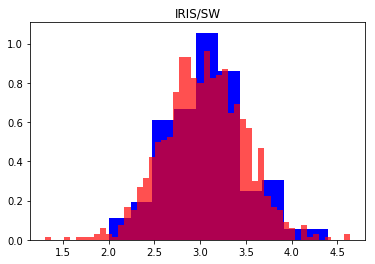

In [65]:
sw_norm=np.random.normal(sw_mean,sw_sd,1000)

plt.hist(sw,density=True, color="#0000FFFF") #density=True normaliza la gráfica
plt.hist(sw_norm,50,density=True,color="#FF0000AF")
plt.title("IRIS/SW")
plt.show()

## Análisis de Correlación

### Correlación de 2 variables con scattered plot

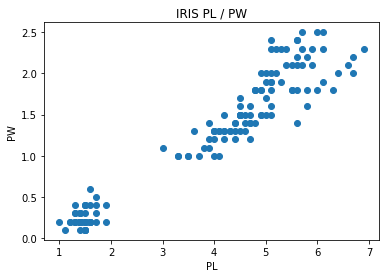

In [73]:
plt.plot(iris["PL"],iris["PW"],"o")
plt.xlabel("PL")
plt.ylabel("PW")
plt.title("IRIS PL / PW")
plt.show()

### Correlación de dos variables incluyendo la variable categórica CLASS con figuras/colores
Vamos a generar una nueva columna en nustro dataframe `Iris` que contenga el valor codificado para la categoría a la que pertenece. Es decir, mapeamos la columna `CLASS`a la columna `color` bajo la transformación dada por el diccionario.

In [74]:
print(sorted(set(iris["CLASS"])))

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [104]:
c={
    "Iris-setosa":"xkcd:pinky",
    "Iris-versicolor": "xkcd:off blue",
    "Iris-virginica":"xkcd:beige"
}

iris["color"]=iris["CLASS"].map(c)

#iris.sample(5).head()



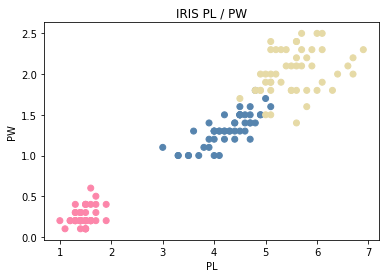

In [122]:
plt.scatter(iris["PL"],iris["PW"],c=iris["color"])
plt.xlabel("PL")
plt.ylabel("PW")
plt.title("IRIS PL / PW")

plt.show()

In [118]:
print(c)

{'Iris-setosa': 'xkcd:pinky', 'Iris-versicolor': 'xkcd:off blue', 'Iris-virginica': 'xkcd:beige'}
